##### KNN 

the larger the K the more bias and underfit the model would be

less K meaning we will ends up with high variance model with overfitting the test data points

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Classified Data.csv')

In [14]:
df = df[[#'Unnamed: 0',
 'WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ',
 'TARGET CLASS']]

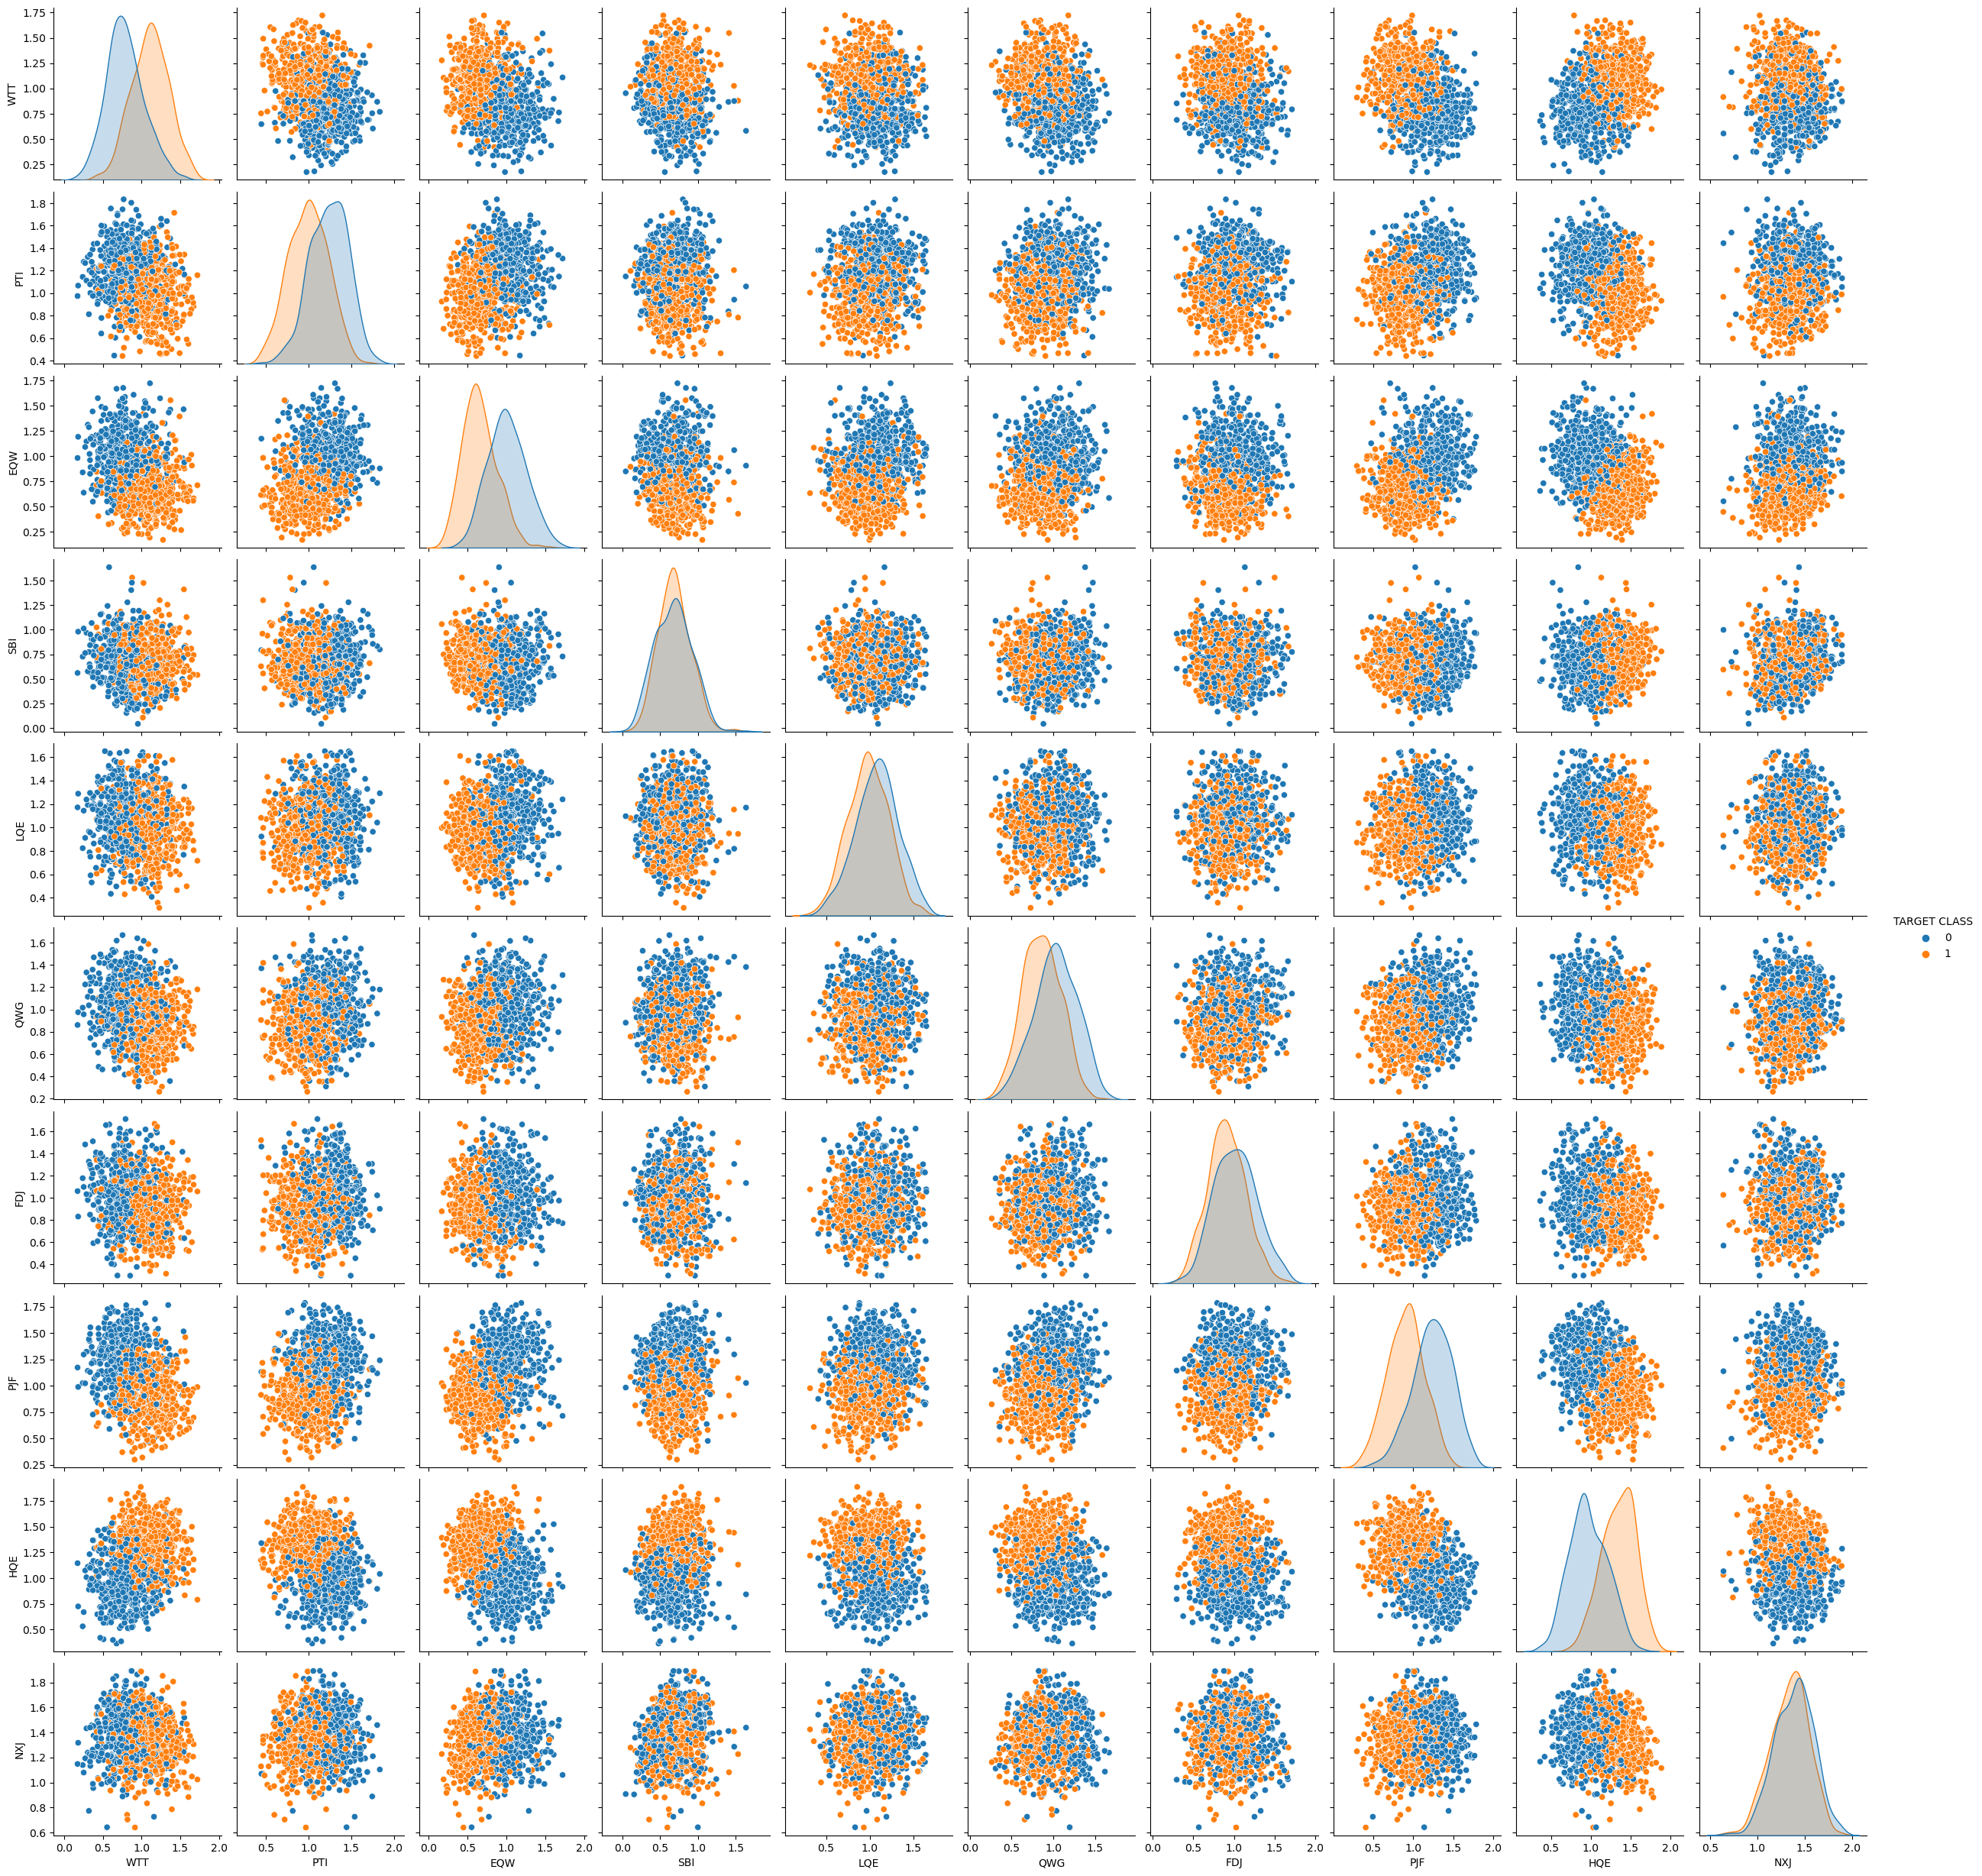

In [18]:
sns.pairplot(df, hue='TARGET CLASS')

<Axes: >

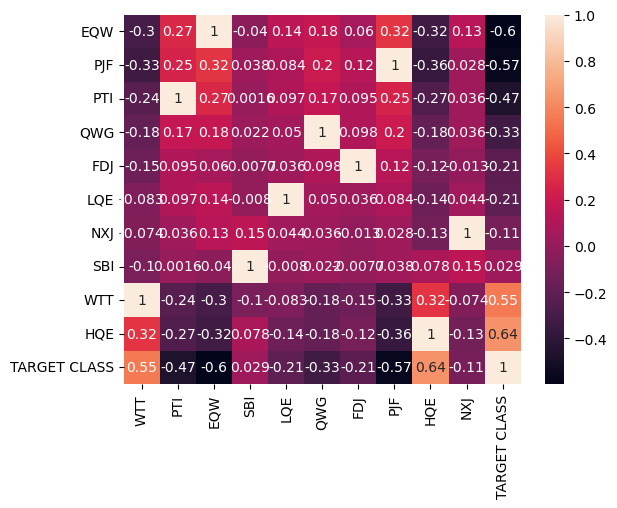

In [20]:
sns.heatmap(df.corr().sort_values('TARGET CLASS'), annot=True)

Scaling the data b4 insert it into the KNN algorithm 

as KNN depends on measuring the distances between data points given 2 features

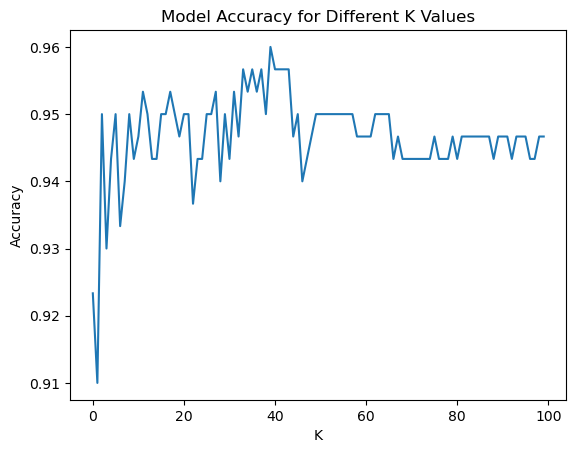

In [237]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df = pd.read_csv('Classified Data.csv')

df = df[[#'Unnamed: 0',
 'WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ',
 'TARGET CLASS']]

# Scale the parameters before insert them into the KNN algorithm as KNN measures distances between data point in scale of defferent parameters


scaller = StandardScaler().fit(X = df.drop('TARGET CLASS', axis=1))
scalled_features = scaller.transform(df.drop('TARGET CLASS', axis=1))
df_feat = pd.DataFrame(scalled_features, columns=df.columns[:-1])
df_feat['TARGET CLASS'] = df['TARGET CLASS']
X = df_feat.drop('TARGET CLASS', axis=1)
y = df_feat['TARGET CLASS']

# Splitting the data into trainning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


# Defining an empty Dataframe to store K vs Accuracy values
result = {'K': [], 'ACC': []}
result = pd.DataFrame(result)

for i in range(100):
    knn = KNeighborsClassifier(n_neighbors = i+1).fit(X = X_train,y = y_train)
    predictions = knn.predict(X_test)
    acc = accuracy_score(y_test,predictions)
    result = pd.concat([result, pd.DataFrame([{'K': i, 'ACC': acc}])], ignore_index=True)

result

plt.plot(result['K'], result['ACC'])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Model Accuracy for Different K Values')
plt.show()

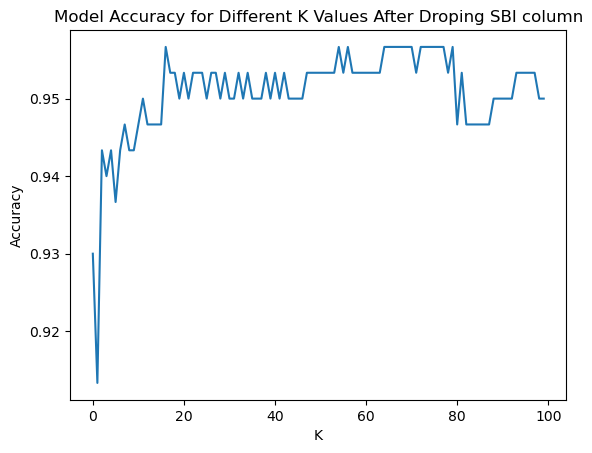

In [238]:
# Second trial for the KNN but with dropping SBI feature column, as it shows no correlarion with the target class

df = pd.read_csv('Classified Data.csv')

df = df[[#'Unnamed: 0',
 'WTT',
 'PTI',
 'EQW',
# 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ',
 'TARGET CLASS']]

# Scale the parameters before insert them into the KNN algorithm as KNN measures distances between data point in scale of defferent parameters

scaller = StandardScaler().fit(X = df.drop('TARGET CLASS', axis=1))
scalled_features = scaller.transform(df.drop('TARGET CLASS', axis=1))
df_feat = pd.DataFrame(scalled_features, columns=df.columns[:-1])
df_feat['TARGET CLASS'] = df['TARGET CLASS']
X = df_feat.drop('TARGET CLASS', axis=1)
y = df_feat['TARGET CLASS']

# Splitting the data into trainning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


# Defining an empty Dataframe to store K vs Accuracy values
result = {'K': [], 'ACC': []}
result = pd.DataFrame(result)

for i in range(100):
    knn = KNeighborsClassifier(n_neighbors = i+1).fit(X = X_train,y = y_train)
    predictions = knn.predict(X_test)
    acc = accuracy_score(y_test,predictions)
    result = pd.concat([result, pd.DataFrame([{'K': i, 'ACC': acc}])], ignore_index=True)

result

plt.plot(result['K'], result['ACC'])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Model Accuracy for Different K Values After Droping SBI column')
plt.show()

### As a result of dropping this irrelevant feature,, we got a much smoother KNN accuracy curve with even greater accuracy !